# Moran I – Monte Carlo

## Libraries and cwd

In [1]:
getwd()

[1] "c:/Users/milan/OneDrive - MUNI/VŠ/PhD/Zahraniční stáž/Work/HeiGIT_notebooks/analysis/ai-assisted-osm-mapping-stats/notebooks-evm-glm-blds/R-analysis"

In [2]:
print(environment())

<environment: R_GlobalEnv>


In [3]:
# library()

In [4]:
# Set the working directory to a specific path
setwd("C:/Users/milan/OneDrive - MUNI/VŠ/PhD/Zahraniční stáž/Work/HeiGIT_notebooks/analysis/ai-assisted-osm-mapping-stats/notebooks-evm-glm-blds")

In [5]:
getwd()

[1] "C:/Users/milan/OneDrive - MUNI/VŠ/PhD/Zahraniční stáž/Work/HeiGIT_notebooks/analysis/ai-assisted-osm-mapping-stats/notebooks-evm-glm-blds"

In [6]:
library(magrittr)
library(dplyr)
library(tidyr)
library(sf)
library(spdep)
library(reticulate)
library(sp)
library(lwgeom)
library(spatialreg)
library(openxlsx)
library(tmap)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'tidyr'


The following object is masked from 'package:magrittr':

    extract


Linking to GEOS 3.11.2, GDAL 3.6.2, PROJ 9.2.0; sf_use_s2() is TRUE

Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Linking to liblwgeom 3.0.0beta1 r16016, GEOS 3.11.2, PROJ 9.2.0

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack



Attaching package: 'spatialreg'


The following objects are masked from 'package:spdep':

    get.ClusterOption, get.coresOption, get.mcOption,
    get.VerboseOption, get.ZeroPolicyOption, set.ClusterOption,
 

## Load the data

In [7]:
datSf <- st_read("geo_df_stats_norm_no-nan_prj.geojson")

Reading layer `geo_df_stats_norm_no-nan_prj' from data source 
  `C:\Users\milan\OneDrive - MUNI\VŠ\PhD\Zahraniční stáž\Work\HeiGIT_notebooks\analysis\ai-assisted-osm-mapping-stats\notebooks-evm-glm-blds\geo_df_stats_norm_no-nan_prj.geojson' 
  using driver `GeoJSON'
Simple feature collection with 219 features and 15 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -16921330 ymin: -8392928 xmax: 17125350 ymax: 8315958
Projected CRS: WGS 84 / Equal Earth Greenwich


In [8]:
st_crs(datSf)

Coordinate Reference System:
  User input: WGS 84 / Equal Earth Greenwich 
  wkt:
PROJCRS["WGS 84 / Equal Earth Greenwich",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["Equal Earth Greenwich",
        METHOD["Equal Earth",
            ID["EPSG",1078]],
        PARAMETER["Longitude of natural origin",0

In [9]:
# Write to GeoPackage
#gpkg_file <- "geo_df_stats_norm_no-nan.gpkg"
#st_write(datSf, gpkg_file, layer = "world-states", driver = "GPKG")


In [10]:
names(datSf)

[1] "NAME_EN"          "ADM0_ISO"         "name_en"          "adm0_iso"        
 [5] "pop_est"          "gdp_md"           "num_of_blds"      "pop_2021"        
 [9] "hdi_2021"         "deaths_2021"      "num_of_blds_norm" "gdp_md_norm"     
[13] "pop_2021_norm"    "hdi_2021_norm"    "deaths_2021_norm" "geometry"

In [11]:
datSf$NAME_EN

[1] "Indonesia"                           
  [2] "Malaysia"                            
  [3] "Chile"                               
  [4] "Bolivia"                             
  [5] "Peru"                                
  [6] "Argentina"                           
  [7] "United Kingdom"                      
  [8] "Cyprus"                              
  [9] "Cyprus"                              
 [10] "Cyprus"                              
 [11] "India"                               
 [12] "People's Republic of China"          
 [13] "Israel"                              
 [14] "Lebanon"                             
 [15] "Ethiopia"                            
 [16] "South Sudan"                         
 [17] "Somalia"                             
 [18] "Somalia"                             
 [19] "Kenya"                               
 [20] "Malawi"                              
 [21] "Tanzania"                            
 [22] "Syria"                               
 [23] "Somaliland"                          
 [24] "Somaliland"                          
 [25] "France"                              
 [26] "Suriname"                            
 [27] "Guyana"                              
 [28] "South Korea"                         
 [29] "North Korea"                         
 [30] "Morocco"                             
 [31] "Western Sahara"                      
 [32] "Costa Rica"                          
 [33] "Nicaragua"                           
 [34] "Republic of the Congo"               
 [35] "Democratic Republic of the Congo"    
 [36] "Bhutan"                              
 [37] "Ukraine"                             
 [38] "Belarus"                             
 [39] "Namibia"                             
 [40] "South Africa"                        
 [41] "Netherlands"                         
 [42] "Oman"                                
 [43] "Uzbekistan"                          
 [44] "Kazakhstan"                          
 [45] "Tajikistan"                          
 [46] "Lithuania"                           
 [47] "Brazil"                              
 [48] "Uruguay"                             
 [49] "Mongolia"                            
 [50] "Russia"                              
 [51] "Czech Republic"                      
 [52] "Germany"                             
 [53] "Estonia"                             
 [54] "Latvia"                              
 [55] "Norway"                              
 [56] "Sweden"                              
 [57] "Finland"                             
 [58] "Vietnam"                             
 [59] "Cambodia"                            
 [60] "Luxembourg"                          
 [61] "United Arab Emirates"                
 [62] "Belgium"                             
 [63] "Abkhazia"                            
 [64] "North Macedonia"                     
 [65] "Albania"                             
 [66] "Azerbaijan"                          
 [67] "Kosovo"                              
 [68] "Kosovo"                              
 [69] "Turkey"                              
 [70] "Spain"                               
 [71] "Laos"                                
 [72] "Kyrgyzstan"                          
 [73] "Armenia"                             
 [74] "Denmark"                             
 [75] "Libya"                               
 [76] "Tunisia"                             
 [77] "Romania"                             
 [78] "Hungary"                             
 [79] "Slovakia"                            
 [80] "Poland"                              
 [81] "Ireland"                             
 [82] "Greece"                              
 [83] "Zambia"                              
 [84] "Sierra Leone"                        
 [85] "Guinea"                              
 [86] "Liberia"                             
 [87] "Central African Republic"            
 [88] "Sudan"                               
 [89] "Djibouti"                          

In [12]:
datSf_df <- as.data.frame(datSf)
head(datSf_df, 10)

,NAME_EN,ADM0_ISO,name_en,adm0_iso,pop_est,gdp_md,num_of_blds,pop_2021,hdi_2021,deaths_2021,num_of_blds_norm,gdp_md_norm,pop_2021_norm,hdi_2021_norm,deaths_2021_norm,geometry
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [m]>
1,Indonesia,IDN,Indonesia,IDN,541251136,2238380,203216,273753191,0.705,696,2.428910e-02,5.195009e-02,0.1938203847,0.5723794,0.1791505792,MULTIPOLYGON (((11261888 53...
2,Malaysia,MYS,Malaysia,MYS,63899554,729362,11160,33573874,0.803,117,1.333883e-03,1.692614e-02,0.0237637261,0.7354409,0.0301158301,MULTIPOLYGON (((11261888 53...
3,Chile,CHL,Chile,CHL,37904076,564636,1361,19493184,0.855,0,1.626716e-04,1.310289e-02,0.0137940288,0.8219634,0.0000000000,MULTIPOLYGON (((-6512442 -2...
4,Bolivia,BOL,Bolivia,BOL,23026200,81790,8063,12079472,0.692,127,9.637186e-04,1.896145e-03,0.0085448212,0.5507488,0.0326898327,MULTIPOLYGON (((-6512442 -2...
5,Peru,PER,Peru,PER,65020906,453696,128,33715471,0.762,103,1.529902e-05,1.052800e-02,0.0238639825,0.6672213,0.0265122265,MULTIPOLYGON (((-6512442 -2...
6,Argentina,ARG,Argentina,ARG,89877424,890890,7557,45808747,0.842,15,9.032397e-04,2.067516e-02,0.0324265105,0.8003328,0.0038610039,MULTIPOLYGON (((-6196962 -2...
7,United Kingdom,GBR,United Kingdom,GBR,134732930,5726332,27522,67326569,0.929,1,3.289528e-03,1.329046e-01,0.0476619977,0.9450915,0.0002574003,MULTIPOLYGON (((2955191 434...
8,Cyprus,CYP,Cyprus,CYP,2397150,49896,706,1244188,0.896,4,8.438365e-05,1.155893e-03,0.0008730025,0.8901830,0.0010296010,MULTIPOLYGON (((2955271 434...
9,Cyprus,CYP,Turkish Republic of Northern Cyprus,CYP,652000,7200,3729,1244188,0.896,4,4.457034e-04,1.649286e-04,0.0008730025,0.8901830,0.0010296010,MULTIPOLYGON (((2955271 434...


## Explore the data and data wrangling

In [13]:
# Replace NaN values with 0
# datSf <- datSf %>%
#    mutate_all(~ ifelse(is.na(.), 0, .))

In [14]:
# st_is_valid(datSf)

In [15]:
# Replace NaN values in attributes with 0
#datSf <- datSf %>%
#    mutate_all(~ ifelse(is.na(.), 0, .))

In [16]:
# Check for invalid geometries
invalid_geom <- st_is_valid(datSf)

# Identify which features have invalid geometries
invalid_indices <- which(!invalid_geom)

# Print the indices of features with invalid geometries
print(invalid_indices)

# Fix the invalid geometries (if possible)
datSf <- st_make_valid(datSf)

integer(0)


In [17]:
# Check for empty geometries
datSf <- datSf[!st_is_empty(datSf), , drop = FALSE]

In [18]:
# Exclude specific columns from datSf
columns_to_exclude <- c("pop_est_norm", "gdp_md_norm", "num_of_blds_norm", "pop_2021_norm", "hdi_2021_norm", "deaths_2021_norm", "geometry") # "geometry"
datSf_subset <- datSf[, (names(datSf) %in% columns_to_exclude)]

# Drop rows with NaN values from datSf
datSf_subset_noNAN <- na.omit(datSf_subset)

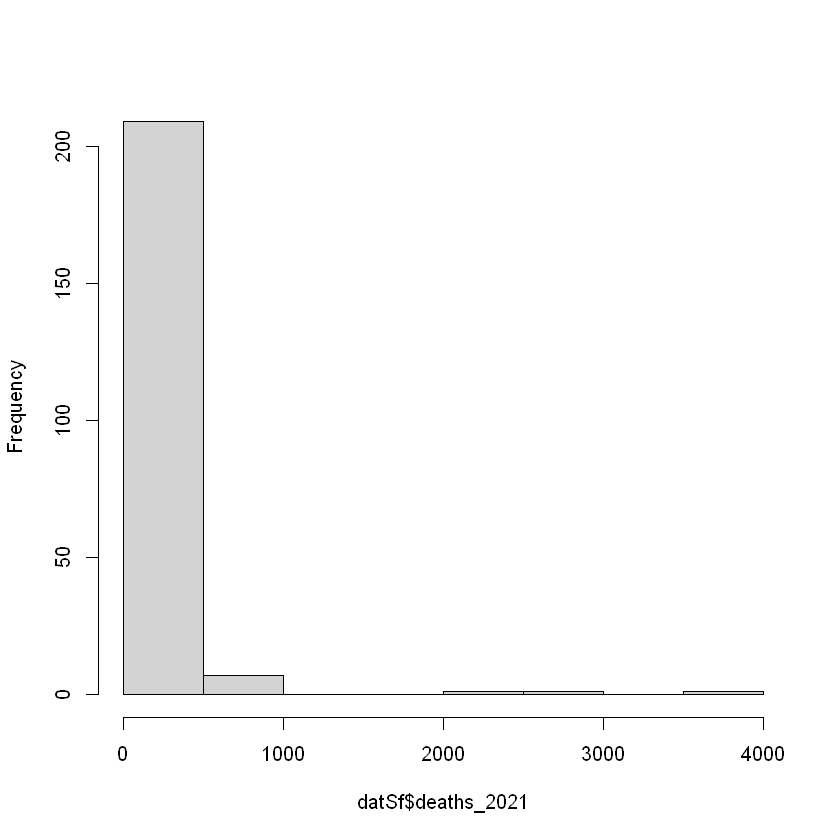

In [18]:
hist(datSf$deaths_2021, main=NULL)

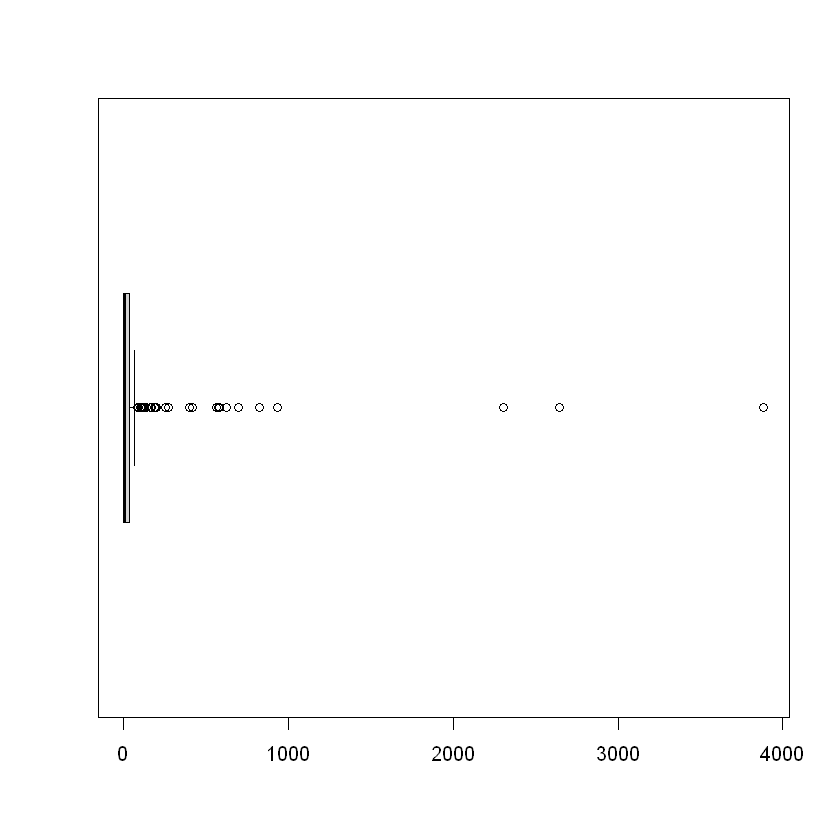

In [19]:
boxplot(datSf$deaths_2021, horizontal = TRUE)

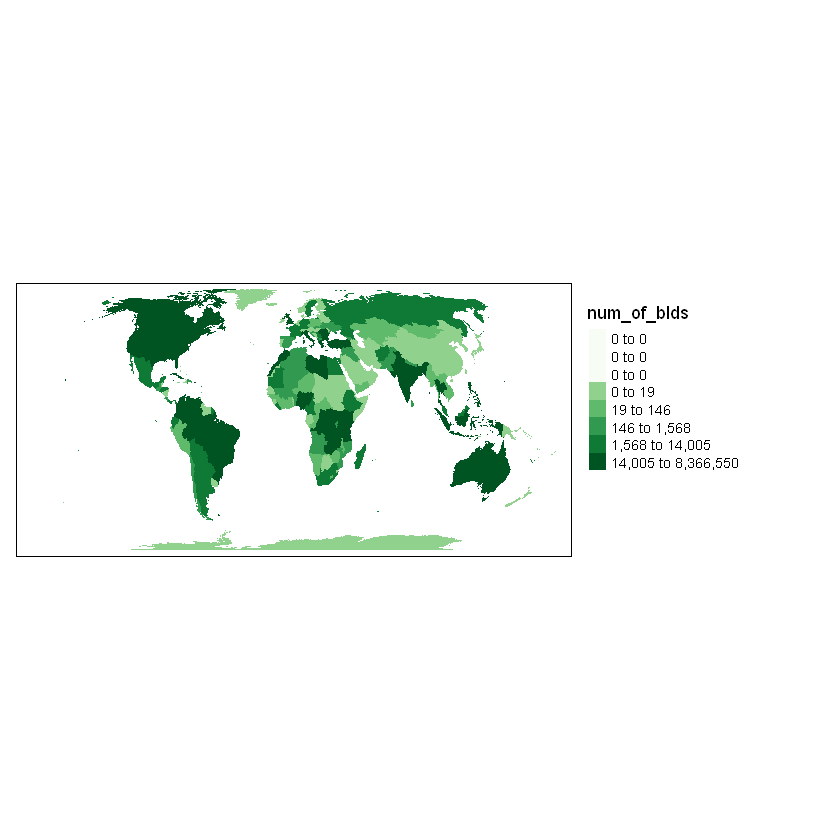

In [20]:
tm_shape(datSf) + tm_fill(col = "num_of_blds", style = "quantile", n = 8, palette = "Greens") +
    tm_legend(outside = TRUE)

## Step 1: Define neighboring polygons


The first step in a Moran’s I analysis requires that we define “neighboring” polygons. This could refer to contiguous polygons, polygons within a certain distance, or it could be non-spatial in nature and defined by social, political or cultural “neighbors”.

Here, we’ll adopt a contiguous neighbor definition. We’ll accept any contiguous polygons that share at least one vertex; this is the “queen” case (if one chooses to adopt the chess analogy) and it’s parameterized as queen = TRUE in the call to poly2nb. If we required that just edges be shared between polygons then we would set queen = FALSE (the rook analogy).

In [21]:
nb <- poly2nb(datSf, queen = TRUE) # queen = TRUE
nb[1]

[[1]]
[1]   2 121 161

In [22]:
nb

Neighbour list object:
Number of regions: 219 
Number of nonzero links: 784 
Percentage nonzero weights: 1.634661 
Average number of links: 3.579909 
44 regions with no links:
136 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
212 213 214 215 216 217 218 219

In [23]:
get.ZeroPolicyOption()

[1] FALSE

In [24]:
set.ZeroPolicyOption(TRUE)

[1] FALSE

In [32]:
# neighbors_count <- lengths(st_touches(datSf, datSf))

# filtered_datSf <- datSf[neighbors_count > 0, ]

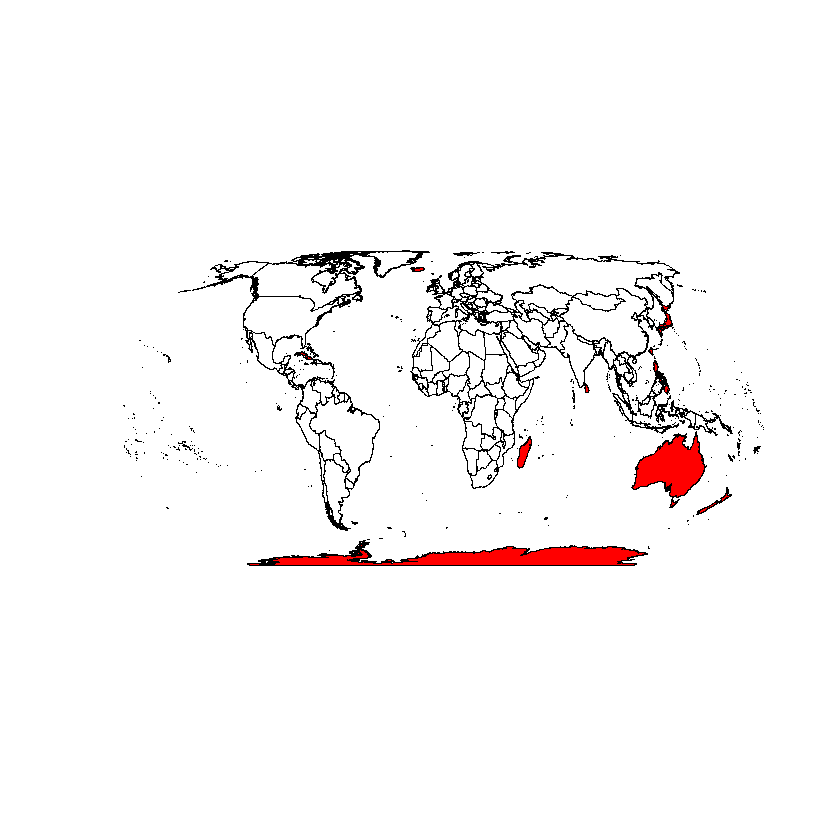

In [25]:
plot(st_geometry(datSf))
plot(st_geometry(datSf)[card(nb) == 0L], add = TRUE, col = "red")

In [47]:
args(poly2nb)
# function (pl, row.names = NULL, snap = sqrt(.Machine$double.eps),
#   queen = TRUE, useC = TRUE, foundInBox = NULL)
sqrt(.Machine$double.eps)
#  [1] 1.490116e-08
nb <- poly2nb(datSf, snap = 1e-5)
nb

function (pl, row.names = NULL, snap = sqrt(.Machine$double.eps), 
    queen = TRUE, useC = TRUE, foundInBox = NULL) 
NULL

[1] 1.490116e-08

Neighbour list object:
Number of regions: 219 
Number of nonzero links: 784 
Percentage nonzero weights: 1.634661 
Average number of links: 3.579909 
44 regions with no links:
136 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
212 213 214 215 216 217 218 219

## Step 2: Assign weights to the neighbors

Next, we need to assign weights to each neighboring polygon. In this example, each neighboring polygon will be assigned equal weight when computing the neighboring mean variable (num_of_blds) values.

In [48]:
lw <- nb2listw(neighbours = nb, style = "W", zero.policy = TRUE)
lw

ERROR while rich displaying an object: Error in print.listw(obj): regions with no neighbours found, use zero.policy=TRUE

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8

In [21]:
lw$weights[1]

[[1]]
[1] 0.3333333 0.3333333 0.3333333

These are the weights each neighboring income value will be multiplied by before being summed. If a polygon has 5 neighbors, each neighbor will have a weight of 1/5 or 0.2. This weight will then be used to compute the mean neighbor values as in 0.2(neighbor1) + 0.2(neighbor2) + 0.2(neighbor3) + 0.2(neighbor4) + 0.2(neighbor5). This is equivalent to summing all five income values then dividing by 5.

## Step 3 (optional): Compute the (weighted) neighbor mean variable (num_of_blds) values

NOTE: This step does not need to be performed when running the moran or moran.test functions outlined in Steps 4 and 5. This step is only needed if you wish to generate a scatter plot between the variable (num_of_blds) values and their lagged states.

Next, we’ll have R compute the average neighbor variable (num_of_blds) value for each polygon. These values are often referred to as spatially lagged values.

In [22]:
nob.lag <- lag.listw(lw, datSf$num_of_blds)
nob.lag

Warning message in lag.listw(lw, datSf$num_of_blds):
"NAs in lagged values"


[1] 3.720000e+03 8.237200e+04 3.937000e+03 3.115940e+04 5.215100e+04
  [6] 2.231071e+04 1.241273e+03 5.959333e+03 5.455500e+03 6.071167e+03
 [11] 5.223571e+03 1.842067e+03 3.062500e+03 1.630000e+02 9.482011e+04
 [16] 1.587072e+05 1.719536e+05 1.719552e+05 4.967333e+04 1.275200e+05
 [21] 1.384646e+05 1.713880e+04 1.280600e+03 1.282200e+03 1.676200e+04
 [26] 4.894967e+04 5.744067e+04 0.000000e+00 2.535667e+03 2.610000e+02
 [31] 1.743000e+04 1.219000e+03 2.102000e+03 5.066600e+03 5.045000e+04
 [36] 8.055500e+03 3.790714e+03 1.822600e+03 3.374440e+04 8.450000e+01
 [41] 1.963333e+03 2.333333e+01 4.544000e+02 1.525200e+03 5.372500e+02
 [46] 1.913500e+03 1.351682e+04 5.080067e+04 3.803500e+03 1.492143e+02
 [51] 1.041000e+03 2.352222e+02 3.803500e+03 1.901750e+03 5.117000e+03
 [56] 0.000000e+00 5.117000e+03 2.300000e+01 1.466267e+04 1.963333e+03
 [61] 0.000000e+00 1.472500e+03 2.314325e+04 1.875471e+04 1.502720e+04
 [66] 1.858980e+04 6.707833e+03 1.059483e+04 8.361625e+03 1.571020e+04
 [71] 8.817000e+03 4.025000e+01 2.133550e+04 3.886000e+03 2.199000e+03
 [76] 8.189500e+03 8.463833e+03 6.209250e+03 3.144000e+02 1.891286e+03
 [81] 2.752200e+04 2.846325e+04 3.080663e+04 1.085000e+03 4.521667e+02
 [86] 7.100000e+01 4.118167e+03 4.305500e+03 1.600750e+03 2.131667e+03
 [91] 4.947625e+03 1.419450e+04 3.350000e+02 8.260400e+03 1.267729e+04
 [96] 2.500000e+00 7.550000e+02 7.201600e+03 9.533800e+03 6.575714e+02
[101] 6.754000e+02 5.130000e+02 2.642173e+05 4.579125e+04 4.823167e+03
[106] 8.950500e+03 0.000000e+00 9.385714e+01 4.207675e+04 3.369700e+04
[111] 3.651400e+03 2.979283e+04 2.823750e+03 3.540700e+04 2.370000e+02
[116] 1.000000e+00 1.788898e+05 2.935000e+02 2.771000e+03 1.963000e+03
[121] 2.032160e+05 1.116000e+04 2.004000e+03 9.806286e+03 6.511217e+04
[126] 4.227500e+03 8.192400e+04 7.906500e+04 1.902460e+04 8.088500e+03
[131] 1.124000e+03 1.821667e+02 9.418286e+03 7.332000e+03 2.198274e+05
[136]           NA 1.196000e+03 5.083900e+04 3.596480e+04 5.348833e+04
[141] 5.080067e+04 2.440000e+02 1.005700e+04 5.767500e+02 2.282500e+02
[146] 8.055500e+03 8.227000e+03 1.759885e+05 5.396667e+02 1.534444e+05
[151] 1.831667e+02 5.270000e+02 3.973333e+02 5.350000e+01 8.222400e+04
[156] 8.366550e+06 2.789346e+06 1.593000e+03 5.085000e+04 8.213167e+04
[161] 2.032160e+05 3.995250e+03 0.000000e+00 2.505000e+02 7.870000e+02
[166] 0.000000e+00 3.540700e+04 5.959333e+03 5.455500e+03 6.071167e+03
[171] 4.469556e+03 4.133667e+03 4.544111e+03 5.723000e+03 4.459000e+03
[176] 6.032500e+03           NA           NA           NA           NA
[181]           NA           NA           NA           NA           NA
[186]           NA           NA           NA           NA           NA
[191]           NA           NA           NA           NA           NA
[196]           NA           NA           NA           NA           NA
[201]           NA           NA           NA           NA           NA
[206]           NA           NA           NA           NA           NA
[211]           NA           NA           NA           NA           NA
[216]           NA           NA           NA           NA

You can plot the relationship between income and its spatially lagged counterpart as follows. The fitted blue line added to the plot is the result of an OLS regression model.

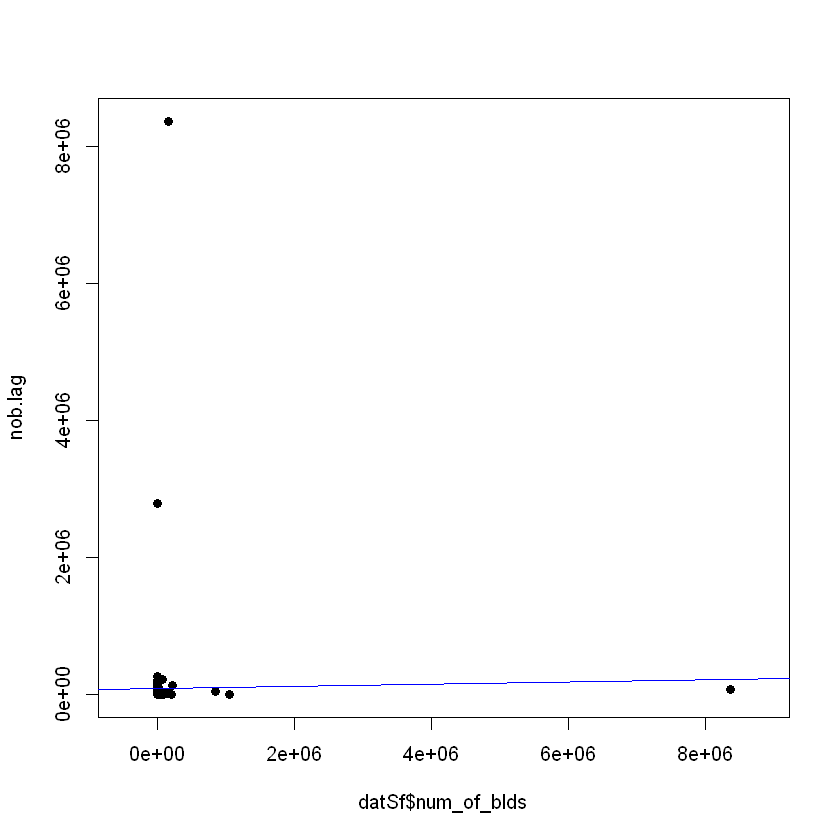

In [23]:
plot(nob.lag ~ datSf$num_of_blds, pch = 16, asp = 1)
M1 <- lm(nob.lag ~ datSf$num_of_blds)
abline(M1, col = "blue")

In [24]:
coef(M1)[2]

datSf$num_of_blds 
         0.015555

NOTE:
The moran’s I coefficient is 0.68. The positive (upward) slope suggests that as the income value of a said polygon increases, so does those of its neighboring polygons. If the slope were negative (i.e. sloping downward), this would suggest a negative relationship whereby increasing values in a said polygon would be surrounded by polygons with decreasing income values.

## Step 4: Computing the Moran’s I statistic

The Moran’s I statistic can be computed using the moran function.

In [25]:
I <- moran(datSf$num_of_blds, lw, length(nb), Szero(lw))[1]
I

Warning message in lag.listw(listw, z, zero.policy = zero.policy, NAOK = NAOK):
"NAs in lagged values"


$I
[1] NA

Recall that the Moran’s I value is the slope of the line that best fits the relationship between neighboring income values and each polygon’s income in the dataset.

## Step 5: Performing a hypothesis test

The hypothesis we are testing states that “the income values are randomly distributed across counties following a completely random process”. There are two methods to testing this hypothesis: an analytical method and a Monte Carlo method. We’ll explore both approaches in the following examples.

Analytical method

To run the Moran’s I analysis using the analytical method, use the moran.test function.

In [26]:
moran.test(datSf$num_of_blds, lw, alternative = "greater")

ERROR: Error in spweights.constants(listw, zero.policy = zero.policy, adjust.n = adjust.n): regions with no neighbours found


The Moran’s I statistic is 0.683 (same value that was computed using the moran function, as expected). The p-value is very small. Usually, when the p-value is very small it’s common practice to report it as < 0.001.

Note that ArcMap adopts this analytical approach to its hypothesis test however, it implements a two-sided test as opposed to the one-sided test adopted in the above example (i.e. alternative = "greater"). A two-sided p-value is nothing more than twice the one-sided p-value. Unfortunately, ArcMap does not seem to make this important distinction in any of its documentation. This distinction can have important ramifications as shown in the next example (Florida crime data). Fortunately, the income data is so strongly clustered that both a one-sided and two-sided test produce the same outcome (a p-value close to 0).

Monte Carlo method

The analytical approach to the Moran’s I analysis benefits from being fast. But it may be sensitive to irregularly distributed polygons. A safer approach to hypothesis testing is to run an MC simulation using the moran.mc() function. The moran.mc function takes an extra argument n, the number of simulations.

In [27]:
MC <- moran.mc(datSf$num_of_blds, lw, nsim = 999, alternative = "greater")

# View results (including p-value)
MC

ERROR: Error in moran.mc(datSf$num_of_blds, lw, nsim = 999, alternative = "greater"): regions with no neighbours found


The MC simulation generates a very small p-value, 0.001. This is not surprising given that the income values are strongly clustered. We can see the results graphically by passing the Moran’s I model to the plot function:

In [28]:
# Plot the Null distribution (note that this is a density plot instead of a histogram)
plot(MC)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'plot': object 'MC' not found


The curve shows the distribution of Moran I values we could expect had the incomes been randomly distributed across the counties. Note that our observed statistic, 0.683, falls way to the right of the distribution suggesting that the income values are clustered (a positive Moran’s I value suggests clustering whereas a negative Moran’s I value suggests dispersion).

Now, had the Moran’s I statistic been negative (suggesting a dispersed pattern), you would probably want to set the alternative argument to less thus giving you the fraction of simulated I values more dispersed than your observed I value.

A visual exercise that you can perform to assess how “typical” or “atypical” your pattern may be relative to a randomly distributed pattern is to plot your observed pattern alongside a few simulated patterns generated under the null hypothesis.

Can you tell the difference between our observed income distribution and those generated from a completely random process? The map on the left is our observed distribution. The three maps on the right are realizations of a completely random process.

## Another example

In [1]:
set.seed(2354)
# Load the shapefile
s <- readRDS(url("https://github.com/mgimond/Data/raw/gh-pages/Exercises/fl_hr80.rds"))

# Define the neighbors (use queen case)
nb <- poly2nb(s, queen = TRUE)

# Compute the neighboring average homicide rates
lw <- nb2listw(nb, style = "W", zero.policy = TRUE)

# Run the MC simulation version of the Moran's I test
M1 <- moran.mc(s$HR80, lw, nsim = 9999, alternative = "greater")

# Plot the results
plot(M1)

# Display the resulting statistics
M1

ERROR: Error in poly2nb(s, queen = TRUE): could not find function "poly2nb"


### From Sven

In [26]:
# Create a neighbor list based on polygon relationships
polynb <- poly2nb(datSf)

In [27]:
polynb

Neighbour list object:
Number of regions: 219 
Number of nonzero links: 784 
Percentage nonzero weights: 1.634661 
Average number of links: 3.579909 
44 regions with no links:
136 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
212 213 214 215 216 217 218 219

In [31]:
# Generate representative points for the polygons
podatSf <- st_point_on_surface(datSf)

Warning message:
"st_point_on_surface assumes attributes are constant over geometries"


In [28]:
podatSf <- st_centroid(datSf, of_largest_polygon = TRUE)

Warning message:
"st_centroid assumes attributes are constant over geometries"


In [35]:
# Check lengths of neighbor lists
empty_neighbors <- which(sapply(distnb$nn, length) == 0)
print(empty_neighbors)

integer(0)


In [36]:
# Remove isolated points from your data
podatSf_edited <- podatSf[-empty_neighbors, ]

In [29]:
# Print first few rows of podatSf
head(podatSf)

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

,NAME_EN,ADM0_ISO,name_en,adm0_iso,pop_est,gdp_md,num_of_blds,pop_2021,hdi_2021,deaths_2021,num_of_blds_norm,gdp_md_norm,pop_2021_norm,hdi_2021_norm,deaths_2021_norm,geometry
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<POINT [m]>
1,Indonesia,IDN,Indonesia,IDN,541251136,2238380,203216,273753191,0.705,696,2.428910e-02,0.051950089,0.193820385,0.5723794,0.179150579,POINT (10920200 -24589.9)
2,Malaysia,MYS,Malaysia,MYS,63899554,729362,11160,33573874,0.803,117,1.333883e-03,0.016926138,0.023763726,0.7354409,0.030115830,POINT (10977511 463859.2)
3,Chile,CHL,Chile,CHL,37904076,564636,1361,19493184,0.855,0,1.626716e-04,0.013102886,0.013794029,0.8219634,0.000000000,POINT (-6194145 -4210590)
4,Bolivia,BOL,Bolivia,BOL,23026200,81790,8063,12079472,0.692,127,9.637186e-04,0.001896145,0.008544821,0.5507488,0.032689833,POINT (-6070145 -2124291)
5,Peru,PER,Peru,PER,65020906,453696,128,33715471,0.762,103,1.529902e-05,0.010527995,0.023863983,0.6672213,0.026512227,POINT (-7075507 -1164978)
6,Argentina,ARG,Argentina,ARG,89877424,890890,7557,45808747,0.842,15,9.032397e-04,0.020675165,0.032426510,0.8003328,0.003861004,POINT (-5667208 -4272191)


In [30]:
distnb <- dnearneigh(podatSf, d1 = 1, d2 = 70 * 10^3)
unionedNb <- union.nb(distnb, polynb)

dlist <- nbdists(unionedNb, st_coordinates(podatSf))
dlist <- lapply(dlist, function(x) 1 / (x + 1e-10)) 
print(dlist)
unionedListw_d <- nb2listw(unionedNb, glist = dlist, style = "W")

[[1]]
[1] 2.033347e-06 6.482405e-07 3.369332e-07

[[2]]
[1] 2.033347e-06 4.827144e-07 8.758962e-06

[[3]]
[1] 4.784731e-07 3.154000e-07 1.884925e-06 5.664349e-07

[[4]]
[1] 4.784731e-07 7.196230e-07 4.575888e-07 7.724844e-07 9.373240e-07

[[5]]
[1] 3.154000e-07 7.196230e-07 4.876831e-07 9.346134e-07 5.998061e-07

[[6]]
[1] 1.884925e-06 4.575888e-07 3.343458e-07 1.363992e-06 7.327495e-07
[6] 1.426825e-06 5.982483e-07

[[7]]
 [1] 2.721692e-07 2.721692e-07 2.721692e-07 7.111108e-07 2.253839e-06
 [6] 2.707158e-07 2.707158e-07 2.707158e-07 2.716140e-07 2.716140e-07
[11] 2.716140e-07

[[8]]
[1] 2.721692e-07 1.000000e+10 1.000000e+10 1.515711e-05 1.515711e-05
[6] 1.515711e-05 3.123797e-05 3.123797e-05 3.123797e-05

[[9]]
[1] 2.721692e-07 1.000000e+10 1.000000e+10 1.515711e-05 1.515711e-05
[6] 1.515711e-05 3.123797e-05 3.123797e-05 3.123797e-05

[[10]]
[1] 2.721692e-07 1.000000e+10 1.000000e+10 1.515711e-05 1.515711e-05
[6] 1.515711e-05 3.123797e-05 3.123797e-05 3.123797e-05

[[11]]
[1] 4.3899

ERROR: Error in nb2listw(unionedNb, glist = dlist, style = "W"): Empty neighbour sets found


In [16]:
distnb

Neighbour list object:
Number of regions: 219 
Number of nonzero links: 47716 
Percentage nonzero weights: 99.48917 
Average number of links: 217.8813 

Scale bar set for latitude km and will be different at the top and bottom of the map.



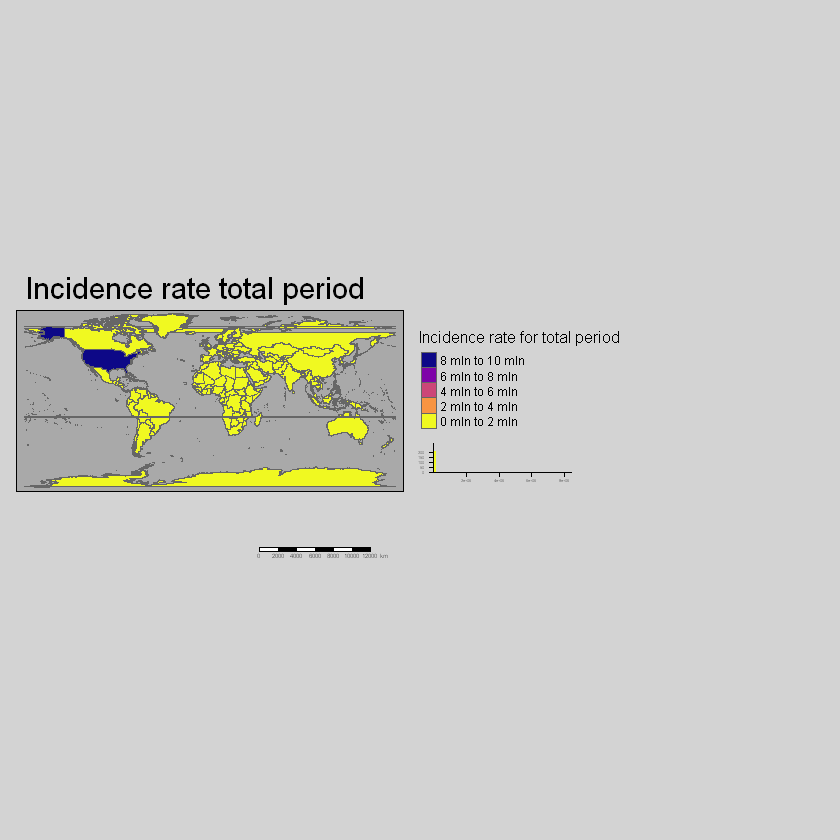

In [17]:
datSf %>%
    tm_shape() + tm_polygons(
        col = c("num_of_blds"), legend.hist = TRUE, palette = "-plasma",
        legend.reverse = TRUE, title = "Incidence rate for total period"
    ) +
    tm_layout(
        legend.outside = TRUE, bg.color = "darkgrey", outer.bg.color = "lightgrey",
        legend.outside.size = 0.5, attr.outside = TRUE,
        main.title = "Incidence rate total period"
    ) +
    tm_scale_bar()


Scale bar set for latitude km and will be different at the top and bottom of the map.



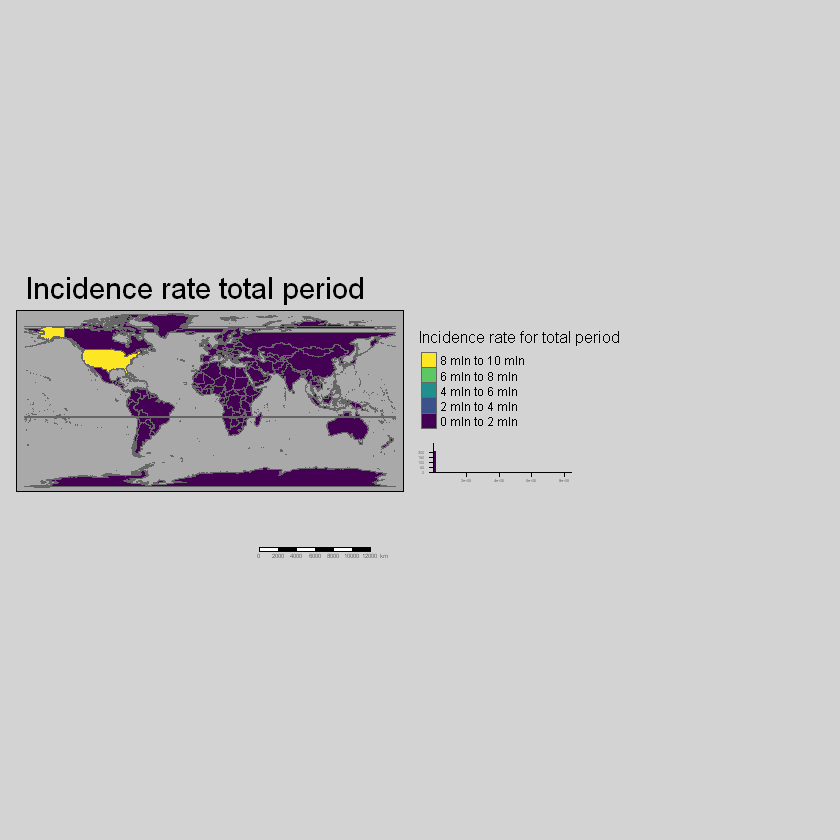

In [17]:
# Set tmap option to check and fix invalid polygons
tmap_options(check.and.fix = TRUE)

# Create the thematic map
datSf %>%
    tm_shape() +
    tm_polygons(
        col = "num_of_blds_norm", legend.hist = TRUE, palette = "viridis",
        legend.reverse = TRUE, title = "Incidence rate for total period"
    ) +
    tm_layout(
        legend.outside = TRUE, bg.color = "#a9a9a9", outer.bg.color = "#d3d3d3",
        legend.outside.size = 0.5, attr.outside = TRUE,
        main.title = "Incidence rate total period"
    ) +
    tm_scale_bar()

Scale bar set for latitude km and will be different at the top and bottom of the map.



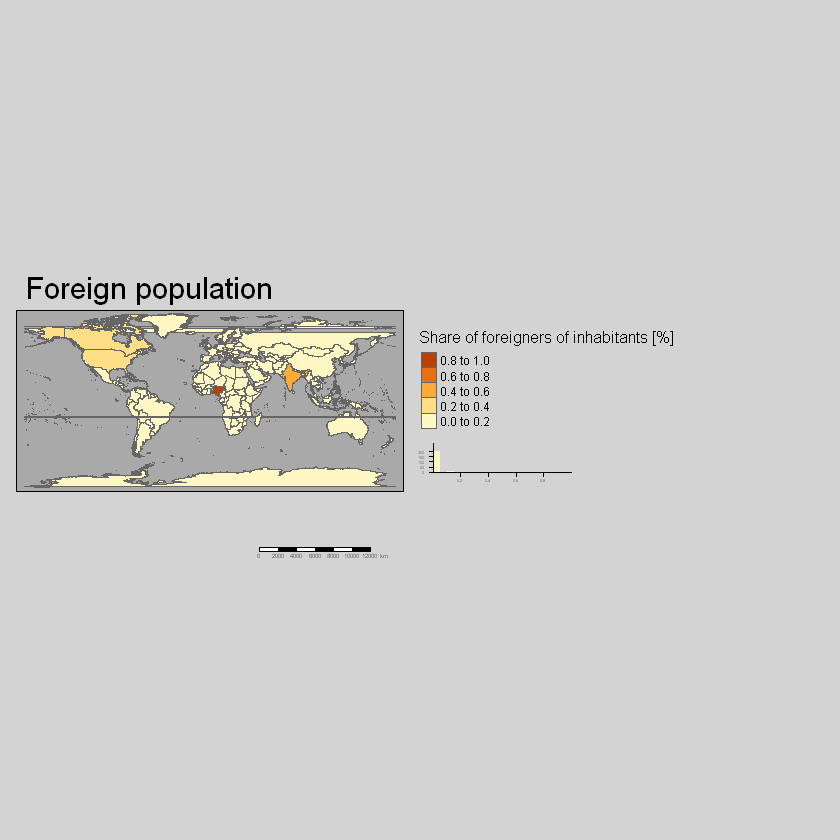

In [18]:
m_deaths_2021_norm <- datSf %>%
    tm_shape() +
    tm_polygons(
        col = c("deaths_2021_norm"),
        legend.hist = TRUE,
        legend.reverse = TRUE,
        title = "Share of foreigners of inhabitants [%]",
        style = "pretty"
    ) +
    tm_layout(
        legend.outside = TRUE, bg.color = "darkgrey",
        outer.bg.color = "lightgrey",
        legend.outside.size = 0.5, attr.outside = TRUE,
        main.title = "Foreign population"
    ) +
    tm_scale_bar()

print(m_deaths_2021_norm)

In [20]:
moran.mc(
    x = datSf$hdi_2021_norm,
    listw = unionedListw_d, nsim = 999
)


	Monte-Carlo simulation of Moran I

data:  datSf$hdi_2021_norm 
weights: unionedListw_d  
number of simulations + 1: 1000 

statistic = 0.16692, observed rank = 1000, p-value = 0.001
alternative hypothesis: greater
